In [3]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import os
import random
import json

In [4]:
os.chdir("/home/bartek/ETH/CS4NLP/project/free-form-VQA/code")
from vqa import VQA

In [5]:
train_imgs_path = "/home/bartek/ETH/CS4NLP/project/train2014"
val_imgs_path = "/home/bartek/ETH/CS4NLP/project/val2014"
random.seed(2137)
pathlib.Path.cwd()

PosixPath('/home/bartek/ETH/CS4NLP/project/free-form-VQA/code')

## Training dataset

In [6]:
dataDir = "/home/bartek/ETH/CS4NLP/project/coco/PythonAPI"
dataType='train2014'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [7]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)
img_ids = coco_caps.getImgIds()

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


In [8]:
coco_caps.loadImgs(img_ids[np.random.randint(0,len(img_ids))])[0]

{'license': 2,
 'file_name': 'COCO_train2014_000000165438.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000165438.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-21 05:12:58',
 'flickr_url': 'http://farm5.staticflickr.com/4132/4991646523_38fc792331_z.jpg',
 'id': 165438}

In [10]:
image_ids_subsample = random.sample(img_ids,int(0.05*len(img_ids)))
len(image_ids_subsample)

4139

In [11]:
i=0
annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
print(img_ids[0])
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

57870
A large brown teddy bear laying on top of a bed with polka dot pillows.
A teddy bear is laying on the bed surrounded by coordinating bed linens.
A teddy bear lays on a bed that is covered with a flowered comforter and a polka dot pillow.
A stuffed teddy bear laying on a bed.
The teddy bear is laying on top of the bedspread.  


In [12]:
vqa = VQA(annotation_file= "../data/v2_mscoco_train2014_annotations.json", question_file="../data/v2_OpenEnded_mscoco_train2014_questions.json")
vqa_val = VQA(annotation_file= "../data/v2_mscoco_val2014_annotations.json", question_file="../data/v2_OpenEnded_mscoco_val2014_questions.json")

q_ids_train = vqa.getImgIds()
q_ids_val = vqa_val.getImgIds()
q_ids_all = q_ids_train+q_ids_val

loading VQA annotations and questions into memory...
0:00:05.785015
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:02.923468
creating index...
index created!


In [13]:
question_ids = [299334,299335, 299336]
questions_set = ["What can be seen in this image?", "What is in this image?", "What this image depicts?"]

assert question_ids not in q_ids_all

annotations = []
questions = []

for i in range(len(image_ids_subsample)):
    question_idx = random.randint(0,2) #or deterministic?
    annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
    anns = coco_caps.loadAnns(annIds)
#     print(anns)
    capt = [an["caption"] for an in anns]
    annot = {"question_type": "describe image","answers": capt,"image_id": image_ids_subsample[i],
             "answer_type": "caption", "question_id": question_ids[question_idx]}
    annotations.append(annot)
    q_item = {"question_id" : question_ids[question_idx], "image_id": image_ids_subsample[i], 
              "question" : questions_set[question_idx]}
    questions.append(q_item)

[{'image_id': 45183, 'id': 76157, 'caption': 'A large brown teddy bear laying on top of a bed with polka dot pillows.'}, {'image_id': 45183, 'id': 77978, 'caption': 'A teddy bear is laying on the bed surrounded by coordinating bed linens.'}, {'image_id': 45183, 'id': 78269, 'caption': 'A teddy bear lays on a bed that is covered with a flowered comforter and a polka dot pillow.'}, {'image_id': 45183, 'id': 79868, 'caption': 'A stuffed teddy bear laying on a bed.'}, {'image_id': 45183, 'id': 81731, 'caption': 'The teddy bear is laying on top of the bedspread.  '}]
[{'image_id': 500694, 'id': 434613, 'caption': 'Two people watching something in a microwave oven.'}, {'image_id': 500694, 'id': 435297, 'caption': 'two people in a kitchen looking at a microwave'}, {'image_id': 500694, 'id': 435450, 'caption': 'Two women are watching as food cooks in a microwave.'}, {'image_id': 500694, 'id': 435495, 'caption': 'A woman that is pointing at a microwave.'}, {'image_id': 500694, 'id': 435516, 'ca

[{'image_id': 291625, 'id': 58495, 'caption': 'People flying traditional kites over water in a large city'}, {'image_id': 291625, 'id': 58993, 'caption': 'Two people fly kites next to a river, with skyscrapers in the background.'}, {'image_id': 291625, 'id': 59632, 'caption': 'People are flying their kites by the river.'}, {'image_id': 291625, 'id': 59932, 'caption': 'A person flying a kite over a body of water.'}, {'image_id': 291625, 'id': 62758, 'caption': 'People flying kites over water near lots of buildings.'}]
[{'image_id': 496430, 'id': 480442, 'caption': 'A snow covered yellow and red fire hydrant.'}, {'image_id': 496430, 'id': 483640, 'caption': 'A closeup of a fire hydrant with snow on it '}, {'image_id': 496430, 'id': 485110, 'caption': 'A fire hydrant on a city street is covered with snow'}, {'image_id': 496430, 'id': 485722, 'caption': 'A fire hydrant sits on the curb in the snow.'}, {'image_id': 496430, 'id': 486238, 'caption': 'A yellow and red fire hydrant with snow on

# annotations

In [16]:
with open("annotations_training.json", "w") as f:
    json.dump({"annotations": annotations}, f )
    
with open("questions_training.json", "w") as q:
    json.dump({"questions": questions}, q)


## Validation dataset

In [17]:
dataDir = "/home/bartek/ETH/CS4NLP/project/coco/PythonAPI"
dataType='val2014'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [18]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)
img_ids = coco_caps.getImgIds()
image_ids_subsample = random.sample(img_ids,int(0.05*len(img_ids)))
len(image_ids_subsample)

loading annotations into memory...
Done (t=0.28s)
creating index...
index created!


2025

In [19]:
question_ids = [299334,299335, 299336]
questions_set = ["What can be seen in this image?", "What is in this image?", "What this image depicts?"]

assert question_ids not in q_ids_all

annotations = []
questions = []

for i in range(len(image_ids_subsample)):
    question_idx = random.randint(0,2) #or deterministic?
    annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
    anns = coco_caps.loadAnns(annIds)
#     print(anns)
    capt = [an["caption"] for an in anns]
    annot = {"question_type": "describe image","answers": capt,"image_id": image_ids_subsample[i],
             "answer_type": "caption", "question_id": question_ids[question_idx]}
    annotations.append(annot)
    q_item = {"question_id" : question_ids[question_idx], "image_id": image_ids_subsample[i], 
              "question" : questions_set[question_idx]}
    questions.append(q_item)

In [20]:
with open("annotations_validation.json", "w") as f:
    json.dump({"annotations": annotations}, f )
    
with open("questions_validation.json", "w") as q:
    json.dump({"questions": questions}, q)


## VQA tool

In [21]:
ids = vqa.getImgIds()
annIds = vqa.getQuesIds(imgIds=random.sample(ids,5))
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']

Question: How many towels are in this room?
Answer 1: 9
Answer 2: 9
Answer 3: 6
Answer 4: 0
Answer 5: 9
Answer 6: 8
Answer 7: 0
Answer 8: 9
Answer 9: 6
Answer 10: 8


In [40]:
# vqa.loadQA(annIds)

In [41]:
imgId

184263

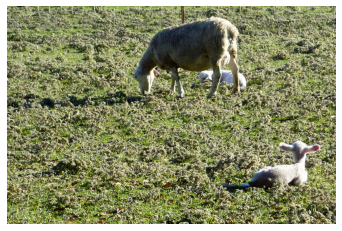

In [65]:
I = io.imread(train_imgs_path + "/COCO_train2014_"+str(imgId).zfill(12)+".jpg")
plt.imshow(I)
plt.axis('off')
plt.show()

In [63]:
image_id = 125567
for i, question in enumerate(questions):
    if question["image_id"] == image_id:
        print(question)
        print(annotations[i])
        

{'question_id': 299334, 'image_id': 125567, 'question': 'What can be seen in this image?'}
{'question_type': 'describe image', 'answers': ['a sheep and two babies in the grass\n', 'A is sheep grazing and her lambs are resting.', 'A mother animal and her babies eating grass.', 'A sheep grazing next to her baby sheep in a green grass covered field.', 'Three lambs, one adult and two smalls ones on a green pasture.'], 'image_id': 125567, 'answer_type': 'caption', 'question_id': 299334}


In [66]:
print(train_imgs_path + "/COCO_train2014_"+str(image_id).zfill(12)+".jpg")
val_imgs_path + "/COCO_val2014_"+str(image_id).zfill(12)+".jpg"

/home/bartek/ETH/CS4NLP/project/train2014/COCO_train2014_000000125567.jpg


'/home/bartek/ETH/CS4NLP/project/val2014/COCO_val2014_000000125567.jpg'

In [19]:
# question = "What can be seen in this image?"

# "annotations": [{"question_type": "describe image", "multiple_choice_answer": "down", "answers": [], "image_id": 262148, "answer_type": "caption", "question_id": question_id}]
# annotation{
# "question_id" : int,
# "image_id" : int,
# "question_type" : str,
# "answer_type" : str,
# "answers" : [answer],
# "multiple_choice_answer" : str
# }